# Installing required packages for dataset balancing

In [1]:
# !pip install imblearn

# Initial contact with input data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
# df  = pd.read_csv('../data/cuisines.csv')

# We can directly read the input data from the corresponding URL
df  = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv')

In [4]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


**Additional exercise**

There are more than 300 columns. Make sure that all of the features are yes/no variables. Detect any variable that contains values other than zero and one.

In [6]:
# We need to exclude both the first column and the label 'cuisine' from this
# analysis because these two columns are not labels
labels_to_exclude = df.columns[:2]
print("Labels to exclude: ", labels_to_exclude)

# A dict comprehension can be used to represent those variables that do not contain only
# 0s and 1s. If the resulting dictionary is empty, then it means that all features are
# indeed yes/no variables.
variables_that_are_not_yes_no = {
    col_i: list(set(df[col_i].unique()))
    for col_i in df.columns
    if set(list(df[col_i].unique())) - {0, 1} != set()
        and col_i not in labels_to_exclude
}
print("Variables that are not yes/no: ", variables_that_are_not_yes_no)




Labels to exclude:  Index(['Unnamed: 0', 'cuisine'], dtype='object')
Variables that are not yes/no:  {}


# Breakdown of the different types of cuisine

<Axes: >

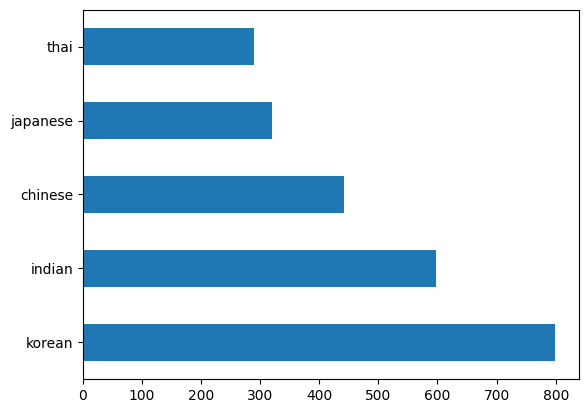

In [7]:
df.cuisine.value_counts().plot.barh()

# What is being represented in the plot below?

In [8]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

# What is happening in the above function? Can you guess what we are trying to get
# at this point?

<Axes: >

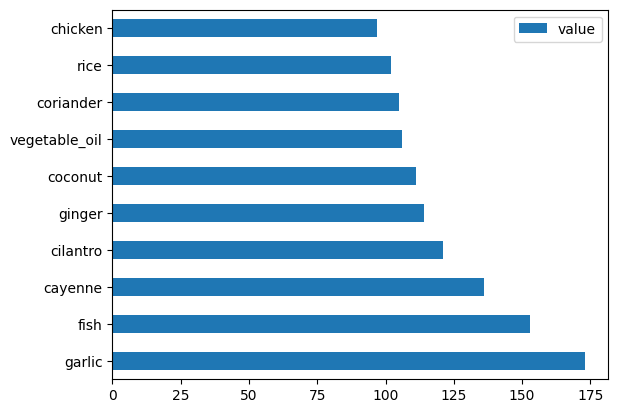

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<Axes: >

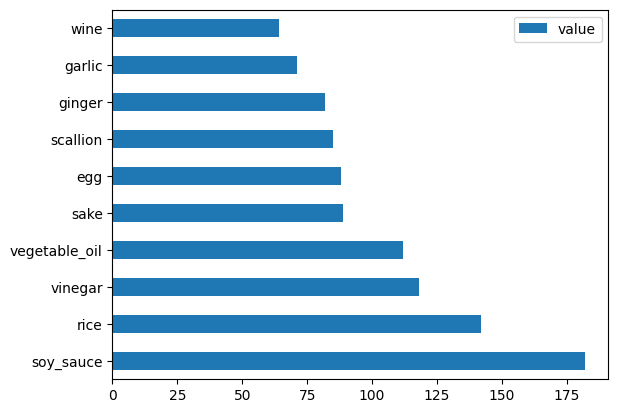

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

<Axes: >

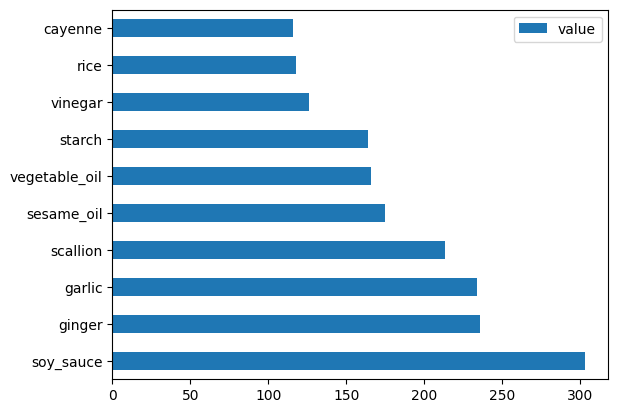

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

<Axes: >

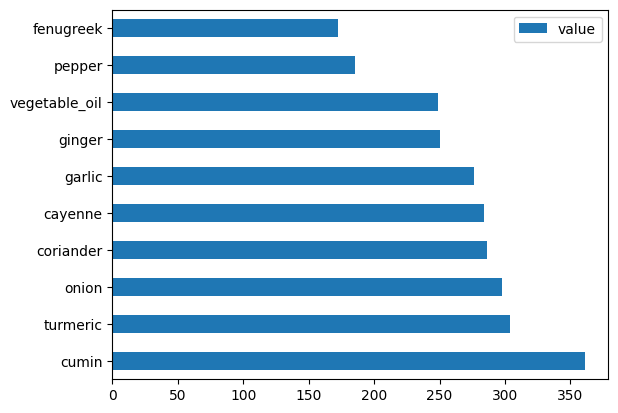

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<Axes: >

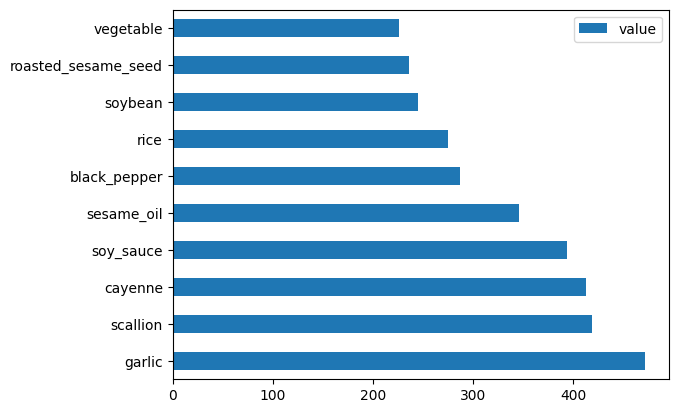

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Additional exercise**

We can observe that rice, garlic and ginger have been removed from the dataset because they seem to be similarly used.
 - Why are we doing this?
 - Can you think of a way to better visualize the differences between the different types of cuisine?

In [16]:
# Alternative visualization for the differences in terms of ingredients between the different cuisines

# One easy way to represent the differences in terms of ingredients' usage is to make use of the relative
# frequencies of the ingredients in the different cuisines and then plot them together into a single
# bar chart
ingredients_columns = set(df.columns) - {'cuisine','Unnamed: 0','rice','garlic','ginger'}
frequency_ingredients = (
    df
    .groupby(["cuisine"], as_index=False)
    .agg({col_i: "sum" for col_i in ingredients_columns})
)
number_of_ingredients_per_cuisine = (
    pd
    .DataFrame(df["cuisine"].value_counts())
    .reset_index(drop=False)
    .rename(columns={"cuisine": "total_length", "index": "cuisine"})
)

In [17]:
number_of_ingredients_per_cuisine

,cuisine,total_length
0,korean,799
1,indian,598
2,chinese,442
3,japanese,320
4,thai,289


In [18]:
frequency_ingredients

,cuisine,egg,turnip,wood,berry,kohlrabi,sour_cherry,mushroom,camembert_cheese,olive_oil,...,anise,black_pepper,chervil,spearmint,gardenia,truffle,liver,tequila,chicken_broth,flower
0,chinese,112,6,0,0,0,1,48,0,10,...,0,101,0,0,0,0,1,0,72,0
1,indian,49,4,0,3,0,0,6,0,90,...,0,113,0,0,0,0,0,0,44,0
2,japanese,88,0,0,0,1,0,21,0,15,...,0,32,0,0,0,0,0,0,11,0
3,korean,151,0,0,0,0,0,49,0,3,...,0,287,0,0,4,0,0,0,3,0
4,thai,30,0,0,0,0,0,19,0,23,...,1,43,1,0,0,0,0,0,55,0


In [19]:
frequency_long = frequency_ingredients.melt(value_vars=ingredients_columns, id_vars="cuisine")
codes, uniques = pd.factorize(frequency_long["variable"], sort=True)
frequency_long["ingredient_id"] = codes
frequency_long.head()

,cuisine,variable,value,ingredient_id
0,chinese,egg,112,119
1,indian,egg,49,119
2,japanese,egg,88,119
3,korean,egg,151,119
4,thai,egg,30,119


In [20]:
relative_freq = pd.merge(
    frequency_long, number_of_ingredients_per_cuisine, on="cuisine", how="left"
)
relative_freq["rel_freq"] = relative_freq["value"] / relative_freq["total_length"]
relative_freq.head()

,cuisine,variable,value,ingredient_id,total_length,rel_freq
0,chinese,egg,112,119,442,0.253394
1,indian,egg,49,119,598,0.081940
2,japanese,egg,88,119,320,0.275000
3,korean,egg,151,119,799,0.188986
4,thai,egg,30,119,289,0.103806


<Axes: xlabel='ingredient_id', ylabel='rel_freq'>

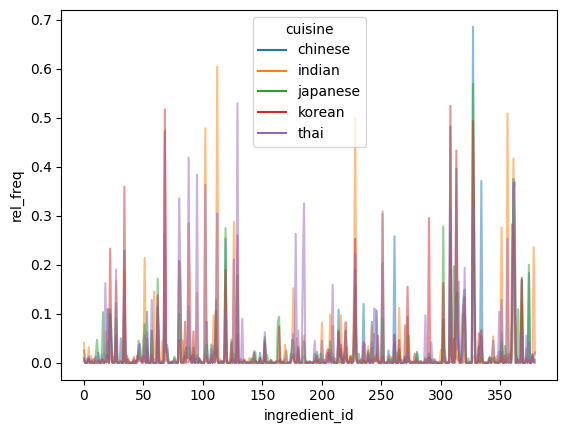

In [21]:
import seaborn as sns

# Using a line plot, we can build a sort of relative ingredients frequency spectrum 
# The spectrum allows us to identify those ingredients that are specially frequent in 
# specific cuisines, hence they are good candidates to be good variables to include in
# a classifier
sns.lineplot(
    x="ingredient_id",
    y="rel_freq",
    hue="cuisine",
    data=relative_freq,
    alpha=0.5,
)

# Use of SMOTE to rebalance the dataset

In [22]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [23]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [24]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

In [25]:
transformed_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [27]:
# transformed_df.to_csv("../data/cleaned_cuisines.csv")

**Additional exercise**

We have applied SMOTE to balance our dataset in preparation for a classification algorithm. That means that we now have the same number of instances of each class (each cuisine in our case).
The whole point of applying SMOTE to our dataset is to create synthetic data to compensate for those classes that have less instances. The new synthetic instances should be somehow similar to the originals.

What would happen if we get the spectrum of relative frequencies for each cuisine and we compare it with the originals

In [28]:
# We can repeat the computations to get the relative frequencies for each ingredient 
# within each cuisine type.
ingredients_columns = set(transformed_df.columns) - {'cuisine','Unnamed: 0'}
frequency_ingredients_new = (
    transformed_df
    .groupby(["cuisine"], as_index=False)
    .agg({col_i: "sum" for col_i in ingredients_columns})
)
number_of_ingredients_per_cuisine_new = (
    pd
    .DataFrame(transformed_df["cuisine"].value_counts())
    .reset_index(drop=False)
    .rename(columns={"cuisine": "total_length", "index": "cuisine"})
)

In [29]:
number_of_ingredients_per_cuisine_new   

,cuisine,total_length
0,indian,799
1,thai,799
2,chinese,799
3,japanese,799
4,korean,799


In [30]:
frequency_ingredients_new

,cuisine,egg,turnip,wood,berry,kohlrabi,sour_cherry,mushroom,camembert_cheese,olive_oil,...,anise,black_pepper,chervil,spearmint,gardenia,truffle,liver,tequila,chicken_broth,flower
0,chinese,154,6,0,0,0,1,57,0,10,...,0,140,0,0,0,0,1,0,110,0
1,indian,56,4,0,3,0,0,6,0,103,...,0,124,0,0,0,0,0,0,49,0
2,japanese,178,0,0,0,1,0,30,0,15,...,0,44,0,0,0,0,0,0,12,0
3,korean,151,0,0,0,0,0,49,0,3,...,0,287,0,0,4,0,0,0,3,0
4,thai,48,0,0,0,0,0,27,0,25,...,1,72,1,0,0,0,0,0,89,0


In [31]:
frequency_long_new = frequency_ingredients_new.melt(value_vars=ingredients_columns, id_vars="cuisine")
codes, uniques = pd.factorize(frequency_long_new["variable"], sort=True)
frequency_long_new["ingredient_id"] = codes
frequency_long_new.head()

,cuisine,variable,value,ingredient_id
0,chinese,egg,154,119
1,indian,egg,56,119
2,japanese,egg,178,119
3,korean,egg,151,119
4,thai,egg,48,119


In [32]:
relative_freq_new = pd.merge(
    frequency_long_new, number_of_ingredients_per_cuisine_new, on="cuisine", how="left"
)
relative_freq_new["rel_freq"] = relative_freq_new["value"] / relative_freq_new["total_length"]
relative_freq_new.head()

,cuisine,variable,value,ingredient_id,total_length,rel_freq
0,chinese,egg,154,119,799,0.192741
1,indian,egg,56,119,799,0.070088
2,japanese,egg,178,119,799,0.222778
3,korean,egg,151,119,799,0.188986
4,thai,egg,48,119,799,0.060075


<Axes: xlabel='ingredient_id', ylabel='rel_freq'>

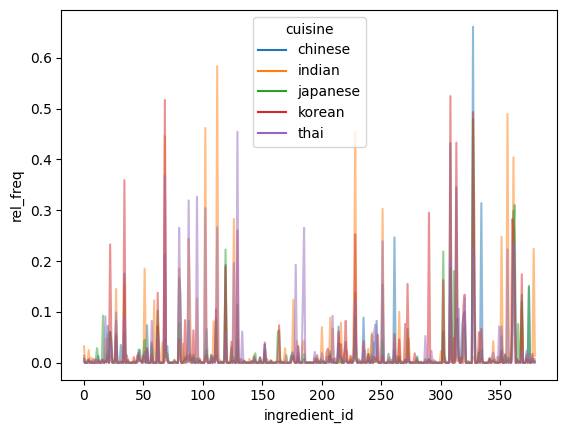

In [33]:
import seaborn as sns

# This is the new spectrum after applying the SMOTE technique
sns.lineplot(
    x="ingredient_id",
    y="rel_freq",
    hue="cuisine",
    data=relative_freq_new,
    alpha=0.5,
)

# We can now plot the old spectrum below in order to compare

<Axes: xlabel='ingredient_id', ylabel='rel_freq'>

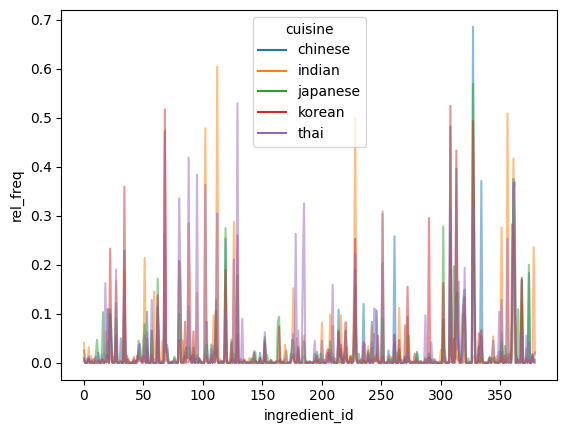

In [34]:
# We can see that the new pattern that we are getting looks very similar to the 
# old pattern. This means that the underlying multinomial distributions representing
# each cuisine in terms of ingredients frequencies remain similar, hence the 
# smote technique did not alter the nature of the data that we are dealing with so 
# that we can have extra certainty that the classifier that we will get is still valid.
sns.lineplot(
    x="ingredient_id",
    y="rel_freq",
    hue="cuisine",
    data=relative_freq,
    alpha=0.5,
)

# Example of a simple classification model

**Additional exercise**

Let us train a simple classification model using both the original and the transformed dataframes.
We will use a model that is good for highly dimensional datasets involving binary variables: Naive Bayes.
For extra context on how this models works, you can check out the following link: [Naive Bayes on sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

In [35]:
# Let us use a train/test approach to assess the difference in terms of performance when 
# applying SMOTE. We need to apply the train/test split to both the original and the new
# dataset
from sklearn.model_selection import train_test_split

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(
    df[ingredients_columns], df["cuisine"], test_size=0.33, random_state=42, stratify=df["cuisine"],
)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    transformed_df[ingredients_columns], transformed_df["cuisine"], stratify=transformed_df["cuisine"],
    test_size=0.33, random_state=42
)

C:\Users\blanco1\AppData\Local\Temp\ipykernel_19412\2099811058.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[ingredients_columns], df["cuisine"], test_size=0.33, random_state=42, stratify=df["cuisine"],
C:\Users\blanco1\AppData\Local\Temp\ipykernel_19412\2099811058.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  transformed_df[ingredients_columns], transformed_df["cuisine"], stratify=transformed_df["cuisine"],


In [36]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

clf_og = BernoulliNB(force_alpha=True)
clf_og.fit(X_train_og, y_train_og)
pred_y_test_og = clf_og.predict(X_test_og)
accuracy_og = accuracy_score(y_true=y_test_og, y_pred=pred_y_test_og)

clf_smote = BernoulliNB(force_alpha=True)
clf_smote.fit(X_train_new, y_train_new)
pred_y_test_new= clf_smote.predict(X_test_new)
accuracy_smote = accuracy_score(y_true=y_test_new, y_pred=pred_y_test_new)

print("Accuracy original: ", accuracy_og)
print("Accuracy SMOTE: ", accuracy_smote)

Accuracy original:  0.7846534653465347
Accuracy SMOTE:  0.756633813495072
